<a href="https://colab.research.google.com/github/Archanamayacharya/coffee-sales-analysis-prediction/blob/main/Coffee_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#It is intended for analysis of purchasing patterns, sales trends, and customer
#preferences related to coffee products.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#reading dataset
data = pd.read_csv("/content/index (1).csv")

In [ ]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,15:50.5,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,46:33.0,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,48:14.6,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
data.shape

(1133, 6)

In [ ]:
#basic statistic
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [ ]:
#all columns
columns=list(data)
columns

['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']

In [ ]:
#checking null values
data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
import pandas as pd

# ----------------- Data Cleaning -----------------

# 1. Combine date + datetime into proper timestamp
data['timestamp'] = pd.to_datetime(
    data['date'] + " " + data['datetime'],
    errors='coerce',
    format='%Y-%m-%d %H:%M.%S'  # Matches format like 15:50.5
)

# 2. Handle invalid timestamps (NaT) - drop them
data = data.dropna(subset=['timestamp'])

# 3. Fix card column: fill NaN with "CASH" where cash_type == "cash"
data.loc[(data['cash_type'].str.lower() == 'cash') & (data['card'].isna()), 'card'] = 'CASH'

# 4. Standardize categorical columns
data['cash_type'] = data['cash_type'].str.strip().str.lower()
data['coffee_name'] = data['coffee_name'].str.strip().str.title()  # e.g., "latte" -> "Latte"

# 5. Clean money column: round to 2 decimals, remove negatives
data = data[data['money'] > 0]
data['money'] = data['money'].round(2)

# 6. Remove duplicates
data = data.drop_duplicates(subset=['timestamp', 'card', 'money', 'coffee_name'])

# 7. Keep only useful columns
cleaned_data = data[['timestamp', 'cash_type', 'card', 'money', 'coffee_name']].reset_index(drop=True)

In [ ]:
import os
os.listdir()
cleaned_data.to_csv("cleaned_coffee_sales.csv", index=False)
from google.colab import files
files.download("cleaned_coffee_sales.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
data=pd.read_csv("/content/cleaned_coffee_sales.csv")

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/cleaned_coffee_sales.csv")

# --- Feature Engineering ---

# 1. Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Extract date-related features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.day_name()
df['is_weekend'] = df['timestamp'].dt.dayofweek >= 5

# 3. Encode categorical features
df['cash_type_encoded'] = df['cash_type'].map({'cash': 0, 'card': 1})

# Coffee name encoding (label encoding)
df['coffee_encoded'] = df['coffee_name'].astype('category').cat.codes

# 4. Customer purchase features
df['transaction_count'] = df.groupby('card')['card'].transform('count')
df['total_spent'] = df.groupby('card')['money'].transform('sum')
df['avg_spent'] = df.groupby('card')['money'].transform('mean')

# 5. Revenue-based features
df['coffee_popularity'] = df.groupby('coffee_name')['coffee_name'].transform('count')
df['coffee_revenue'] = df.groupby('coffee_name')['money'].transform('sum')

# 6. Price-related features
df['above_avg_price'] = df['money'] > df['money'].mean()

# Display new dataset
df.head(10)

,timestamp,cash_type,card,money,coffee_name,year,month,day,day_of_week,is_weekend,cash_type_encoded,coffee_encoded,transaction_count,total_spent,avg_spent,coffee_popularity,coffee_revenue,above_avg_price
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,2024,3,1,Friday,False,1,7,11,418.84,38.076364,108,3986.34,True
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1,Friday,False,1,6,2,77.40,38.700000,36,1367.38,True
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1,Friday,False,1,6,2,77.40,38.700000,36,1367.38,True
3,2024-03-01,card,ANON-0000-0000-0006,38.7,Hot Chocolate,2024,3,1,Friday,False,1,6,1,38.70,38.700000,36,1367.38,True
4,2024-03-01,card,ANON-0000-0000-0008,38.7,Cocoa,2024,3,1,Friday,False,1,3,2,72.50,36.250000,15,564.46,True
5,2024-03-01,card,ANON-0000-0000-0008,33.8,Americano With Milk,2024,3,1,Friday,False,1,1,2,72.50,36.250000,93,2952.72,True
6,2024-03-02,card,ANON-0000-0000-0010,28.9,Americano,2024,3,2,Saturday,True,1,0,1,28.90,28.900000,71,1934.42,False
7,2024-03-03,cash,CASH,40.0,Latte,2024,3,3,Sunday,True,0,7,34,1304.00,38.352941,108,3986.34,True
8,2024-03-03,card,ANON-0000-0000-0017,38.7,Hot Chocolate,2024,3,3,Sunday,True,1,6,2,77.40,38.700000,36,1367.38,True
9,2024-03-03,card,ANON-0000-0000-0018,38.7,Cocoa,2024,3,3,Sunday,True,1,3,1,38.70,38.700000,15,564.46,True


Summary:
                             timestamp cash_type                 card  \
count                             479       479                  479   
unique                            NaN         2                  217   
top                               NaN      card  ANON-0000-0000-0012   
freq                              NaN       445                   38   
mean    2024-05-19 22:35:49.478079488       NaN                  NaN   
min               2024-03-01 00:00:00       NaN                  NaN   
25%               2024-04-14 00:00:00       NaN                  NaN   
50%               2024-05-23 00:00:00       NaN                  NaN   
75%               2024-06-21 00:00:00       NaN                  NaN   
max               2024-07-31 00:00:00       NaN                  NaN   
std                               NaN       NaN                  NaN   

             money coffee_name    year       month         day day_of_week  \
count   479.000000         479   479.0  479.000

/tmp/ipython-input-905142668.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cash_type", data=df, palette="Set2")


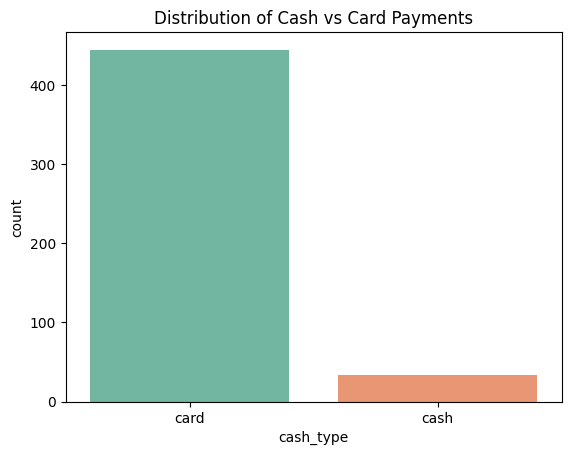

/tmp/ipython-input-905142668.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coffees.values, y=top_coffees.index, palette="viridis")


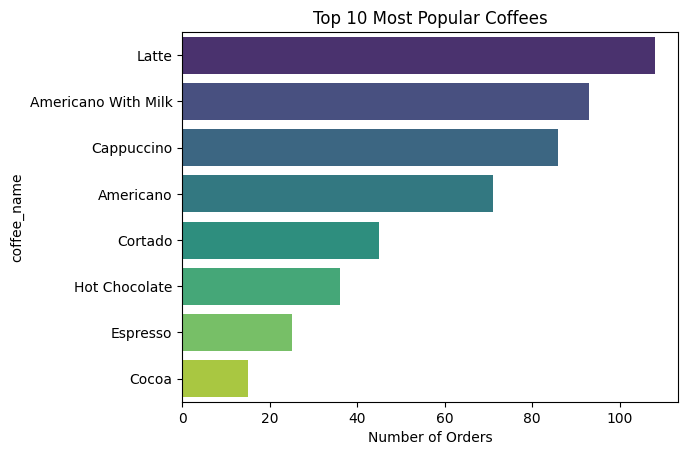

/tmp/ipython-input-905142668.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_revenue.values, y=coffee_revenue.index, palette="mako")


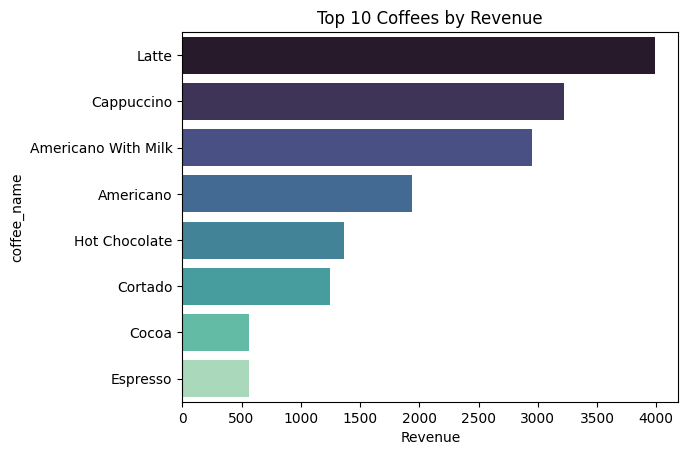

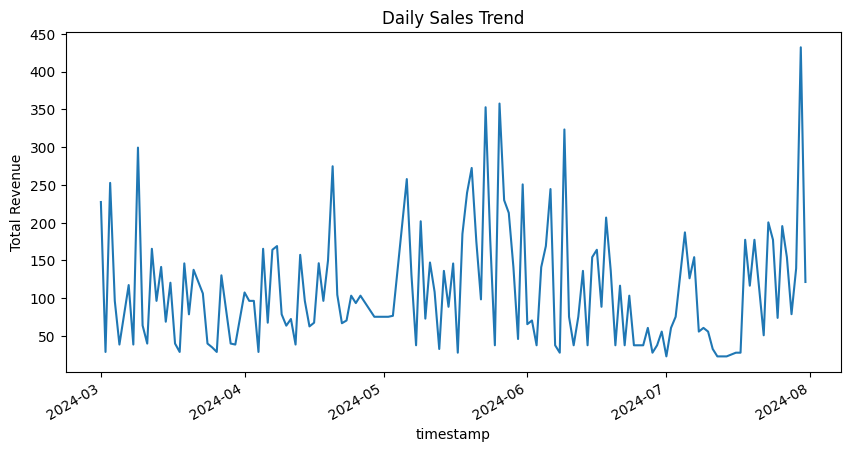

/tmp/ipython-input-905142668.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="money", data=df, estimator="sum", palette="coolwarm",


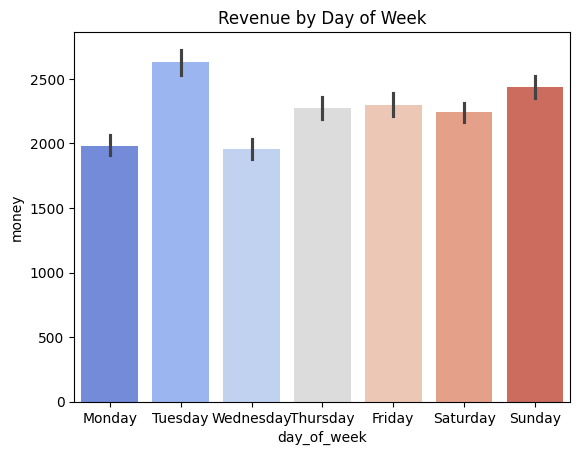

/tmp/ipython-input-905142668.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_weekend", y="money", data=df, palette="Set3")


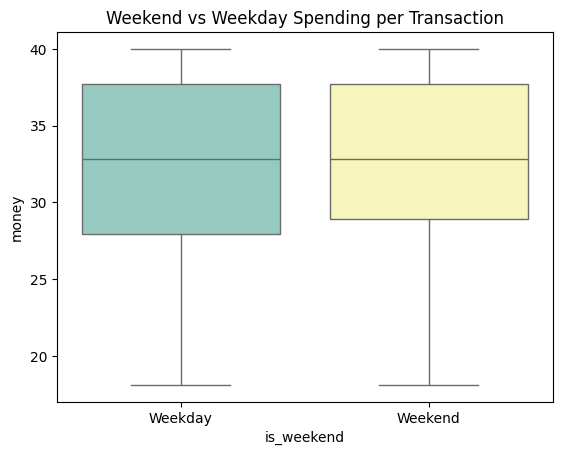

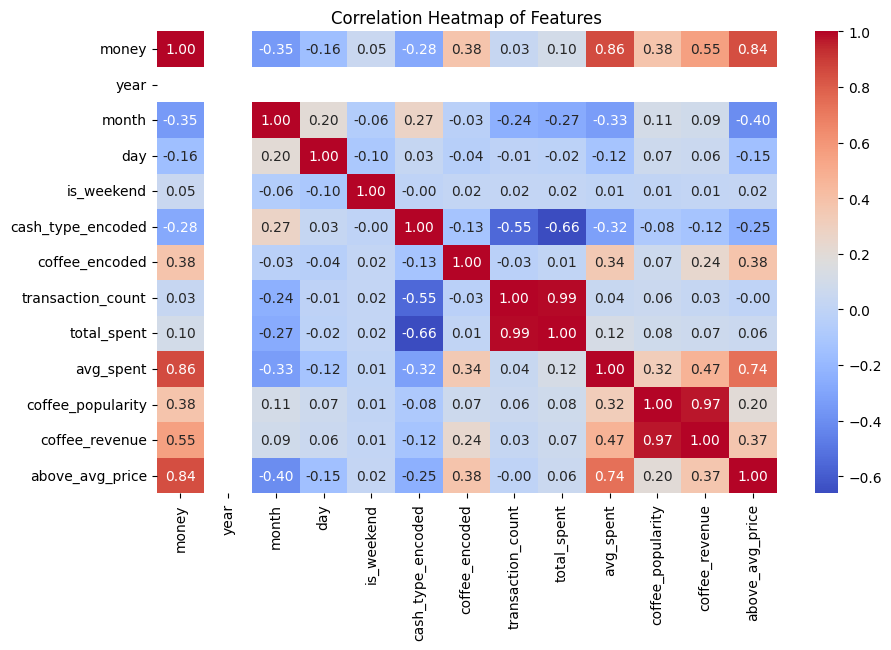

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- EDA ---

# 1. Summary statistics
print("Summary:\n", df.describe(include='all'))

# 2. Distribution of transactions by payment type
sns.countplot(x="cash_type", data=df, palette="Set2")
plt.title("Distribution of Cash vs Card Payments")
plt.show()

# 3. Coffee popularity (top 10)
top_coffees = df['coffee_name'].value_counts().head(10)
sns.barplot(x=top_coffees.values, y=top_coffees.index, palette="viridis")
plt.title("Top 10 Most Popular Coffees")
plt.xlabel("Number of Orders")
plt.show()

# 4. Revenue contribution per coffee
coffee_revenue = df.groupby("coffee_name")['money'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=coffee_revenue.values, y=coffee_revenue.index, palette="mako")
plt.title("Top 10 Coffees by Revenue")
plt.xlabel("Revenue")
plt.show()

# 5. Daily sales trend
daily_sales = df.groupby("timestamp")['money'].sum()
daily_sales.plot(figsize=(10,5))
plt.title("Daily Sales Trend")
plt.ylabel("Total Revenue")
plt.show()

# 6. Sales by day of week
sns.barplot(x="day_of_week", y="money", data=df, estimator="sum", palette="coolwarm",
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Revenue by Day of Week")
plt.show()

# 7. Weekend vs Weekday sales
sns.boxplot(x="is_weekend", y="money", data=df, palette="Set3")
plt.title("Weekend vs Weekday Spending per Transaction")
plt.xticks([0,1], ["Weekday","Weekend"])
plt.show()

# 8. Correlation heatmap (numeric features)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Target = money
y = df['money']
X = df[['year','month','day','is_weekend','coffee_encoded',
        'transaction_count','total_spent','avg_spent',
        'coffee_popularity','coffee_revenue']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Root Mean Squared Error: 1.5039049264885962
R² Score: 0.9014340406562296


In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df[['year','month','day','is_weekend','coffee_encoded',
        'transaction_count','total_spent','avg_spent',
        'coffee_popularity','coffee_revenue']]
y = df['money']

# Split the data
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% goes to test set
    random_state=42,      # ensures reproducibility
    shuffle=True          # shuffles before splitting
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (383, 10)
Testing set size: (96, 10)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
lin_reg = LinearRegression()

# Train
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)

# Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("Root Mean Squared Error:", rmse_lr)
print("R² Score:", r2_lr)

Linear Regression Performance:
Root Mean Squared Error: 1.7383653701578248
R² Score: 0.868305295249828


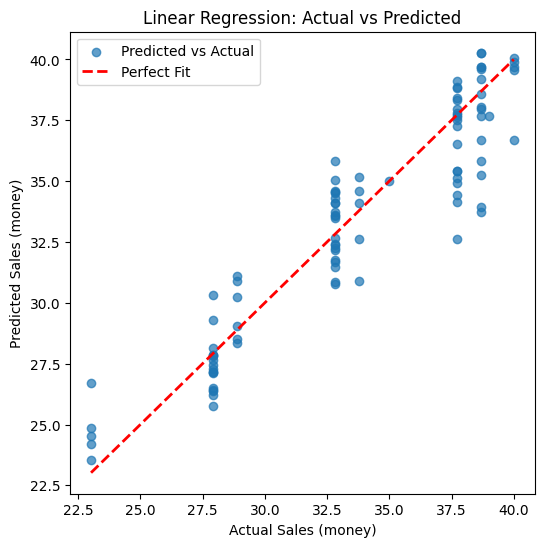

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Sales (money)")
plt.ylabel("Predicted Sales (money)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = lin_reg.coef_

# Combine into DataFrame
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)

             Feature  Coefficient
7          avg_spent     0.436316
3         is_weekend     0.055386
5  transaction_count     0.037817
9     coffee_revenue     0.011173
0               year     0.000000
6        total_spent    -0.001193
2                day    -0.050882
4     coffee_encoded    -0.341058
8  coffee_popularity    -0.369135
1              month    -0.760002


In [ ]:
# Get feature importances
importances = reg_model.feature_importances_

# Combine into DataFrame
rf_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(rf_importance_df)

             Feature  Importance
7          avg_spent    0.676815
9     coffee_revenue    0.113352
8  coffee_popularity    0.068457
1              month    0.065705
4     coffee_encoded    0.059521
2                day    0.010264
6        total_spent    0.003344
5  transaction_count    0.002351
3         is_weekend    0.000191
0               year    0.000000


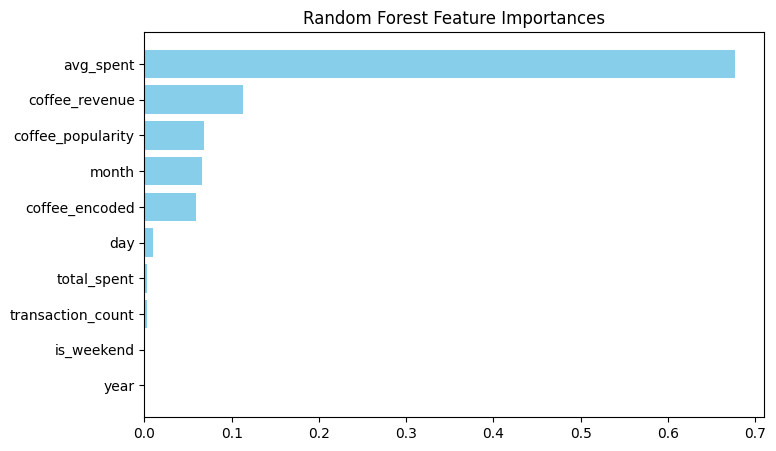

In [ ]:
#Optional: Plot feature importance 🔥
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(rf_importance_df["Feature"], rf_importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv=5, scoring='r2')
print("Cross-Validation R² scores:", scores)
print("Average R²:", scores.mean())

Cross-Validation R² scores: [0.82770559 0.84774193 0.85037691 0.67611455 0.45490879]
Average R²: 0.7313695527507466


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],   # number of trees
    'max_depth': [None, 5, 10, 20],    # tree depth
    'min_samples_split': [2, 5, 10],   # minimum samples to split
    'min_samples_leaf': [1, 2, 4],     # minimum samples at leaf
    'max_features': ['auto', 'sqrt']   # number of features considered
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=reg_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.9693916010691357


In [ ]:
# Retrain model with best parameters
best_rf = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predict again
y_pred_best = best_rf.predict(X_test)

# Evaluate again
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Final Model RMSE:", rmse_best)
print("Final Model R²:", r2_best)

Final Model RMSE: 1.2069527472394916
Final Model R²: 0.9365156431077896


             Feature  Importance
7          avg_spent    0.336046
9     coffee_revenue    0.218615
8  coffee_popularity    0.157971
4     coffee_encoded    0.137804
1              month    0.077403
6        total_spent    0.036965
2                day    0.019964
5  transaction_count    0.012916
3         is_weekend    0.002316
0               year    0.000000


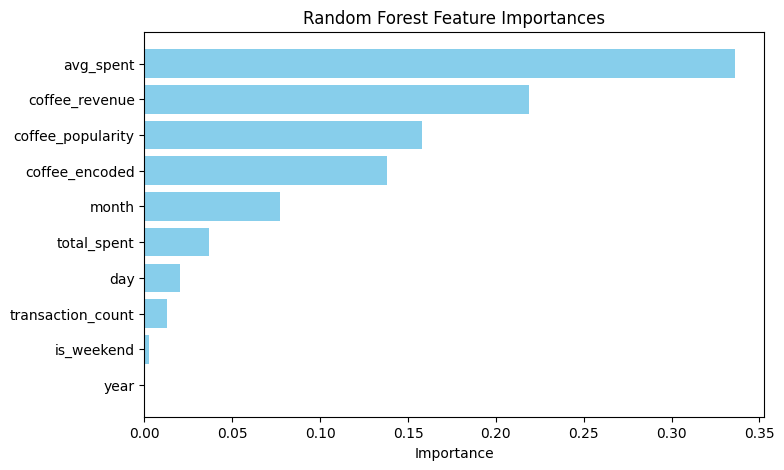

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = best_rf.feature_importances_

# Put in DataFrame
rf_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(rf_importance_df)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(rf_importance_df["Feature"], rf_importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()

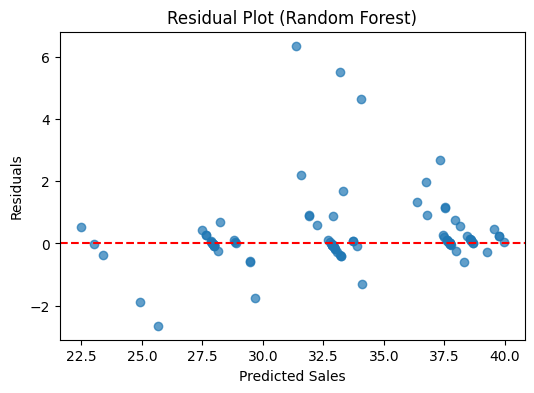

In [ ]:
import numpy as np

residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
plt.scatter(y_pred_best, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()